In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore all warnings
warnings.filterwarnings("ignore")

In [31]:
df=pd.read_csv('D:\classification\Iris Dataset.csv')

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [36]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

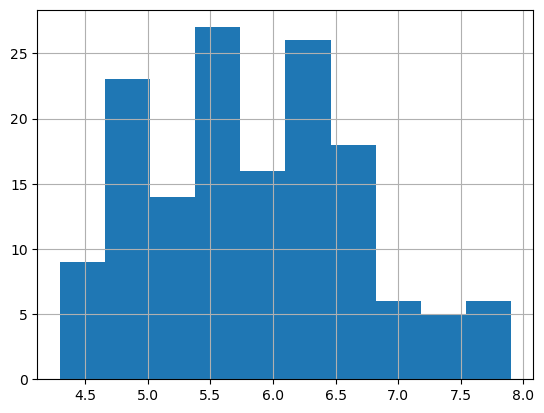

In [37]:
df['sepal_length'].hist()

<Axes: >

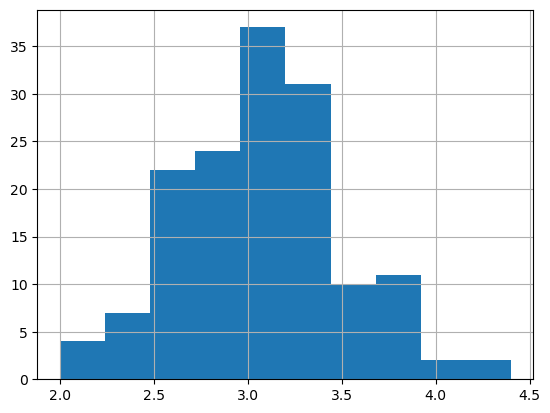

In [38]:
df['sepal_width'].hist()

<Axes: >

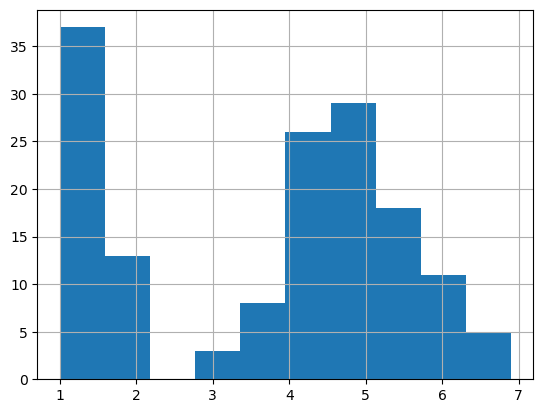

In [39]:
df['petal_length'].hist()

<Axes: >

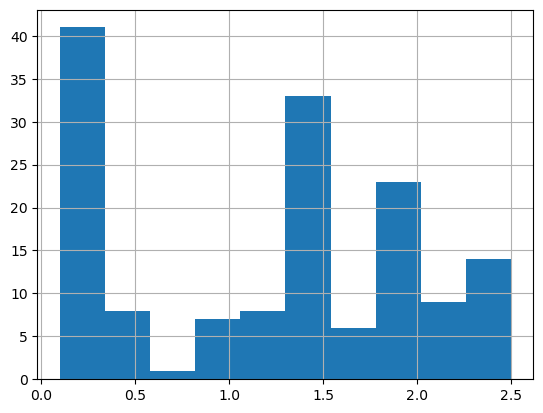

In [40]:
df['petal_width'].hist()

In [41]:
colors=['red','orange','blue']
species=['virginica','versicolor','setosa']

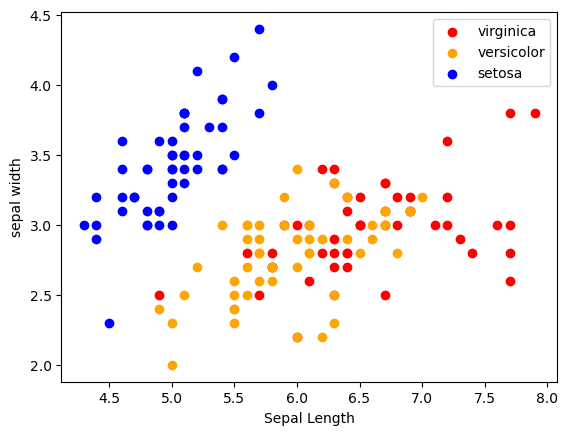

In [42]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c= colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("sepal width")
plt.legend()

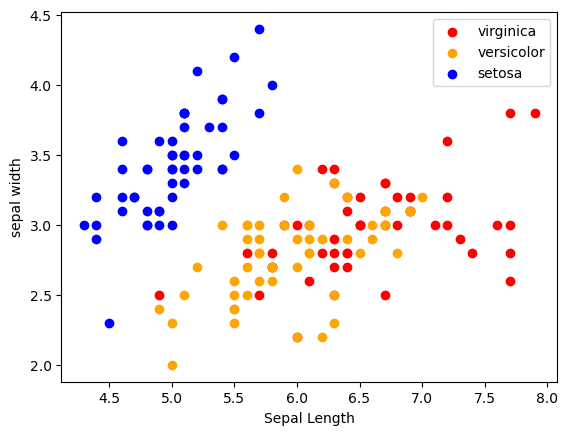

In [43]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c= colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("sepal width")
plt.legend()

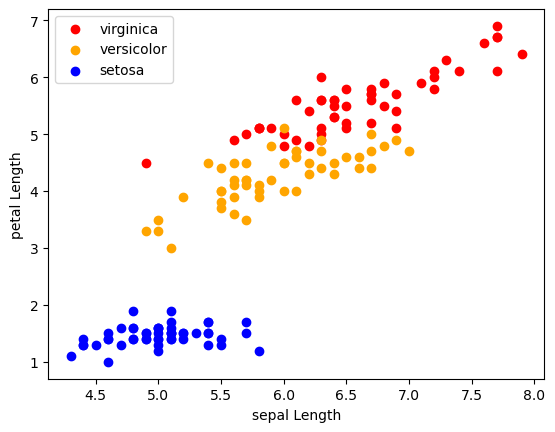

In [44]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c= colors[i],label=species[i])
    
plt.xlabel("sepal Length")
plt.ylabel("petal Length")
plt.legend()

<Axes: xlabel='species', ylabel='sepal_width'>

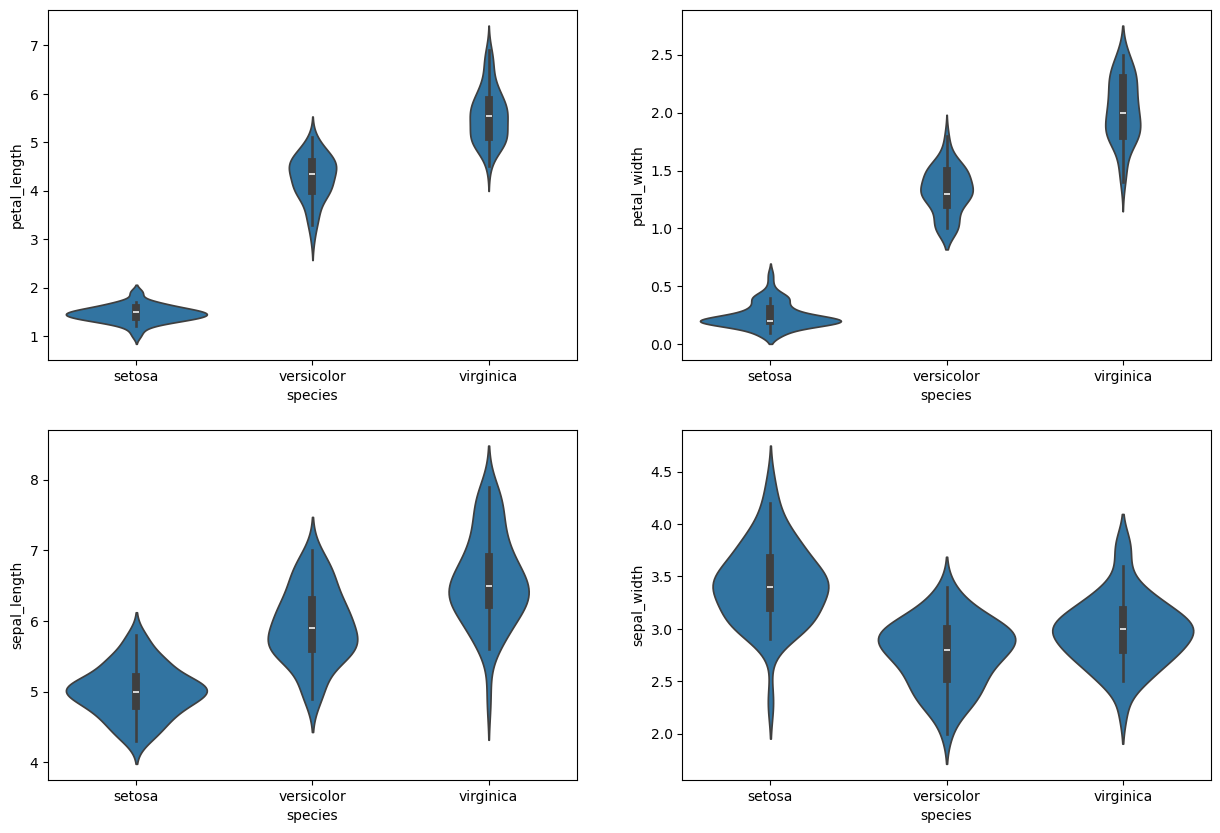

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

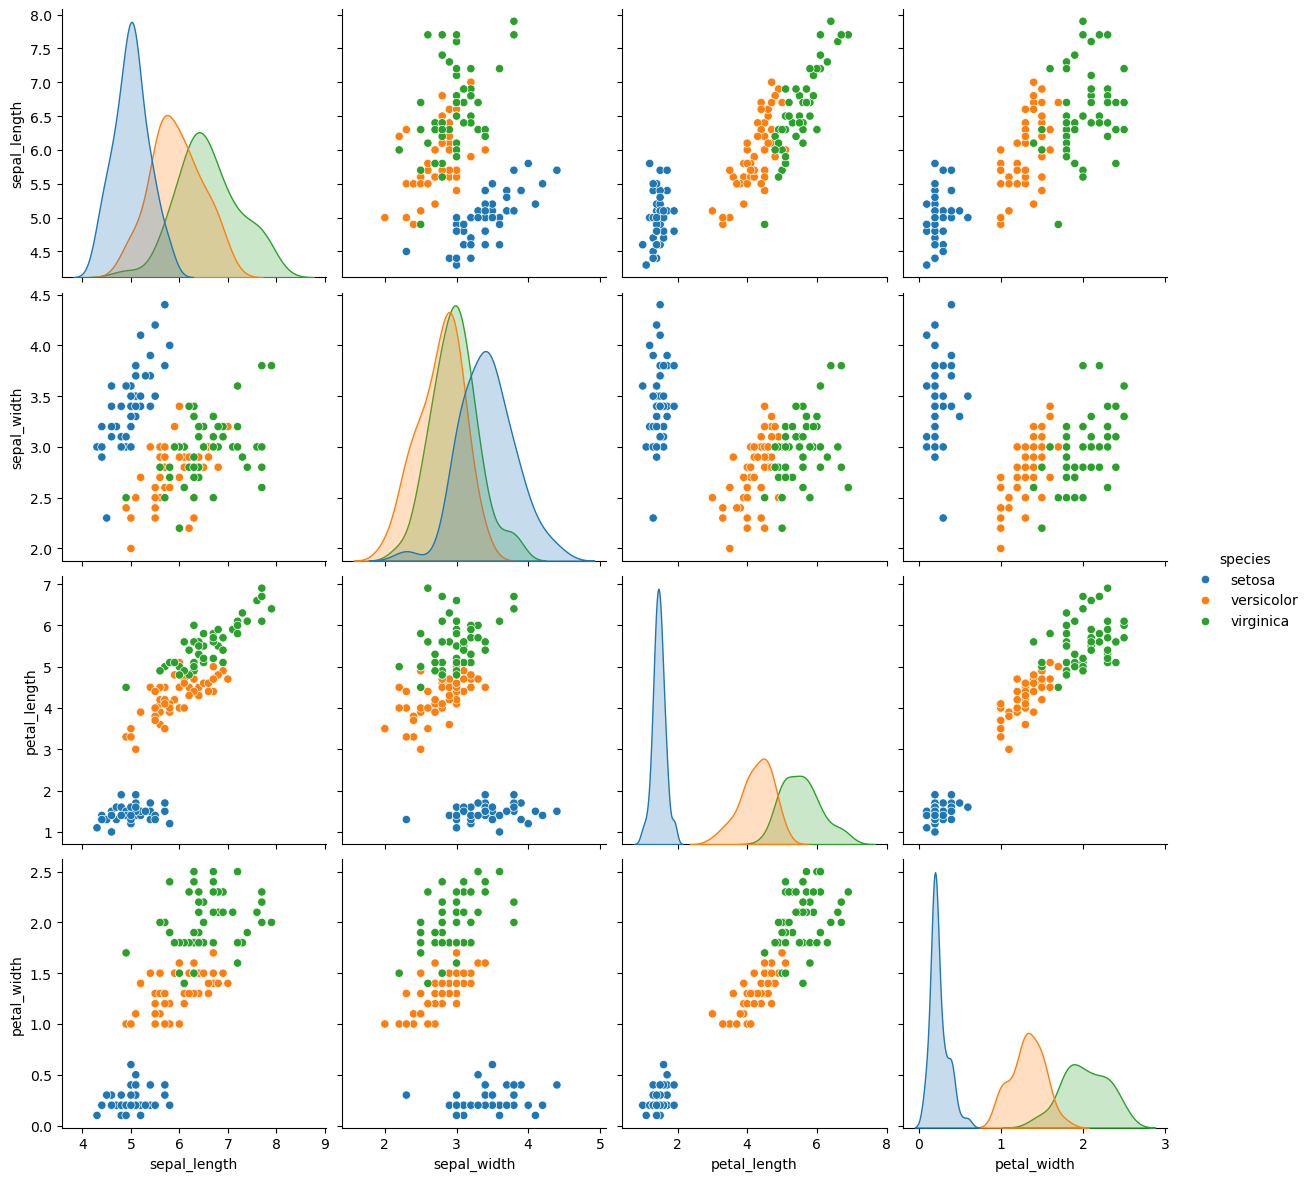

In [46]:
sns.pairplot(df, hue="species", size=3)

In [47]:
corr=df.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


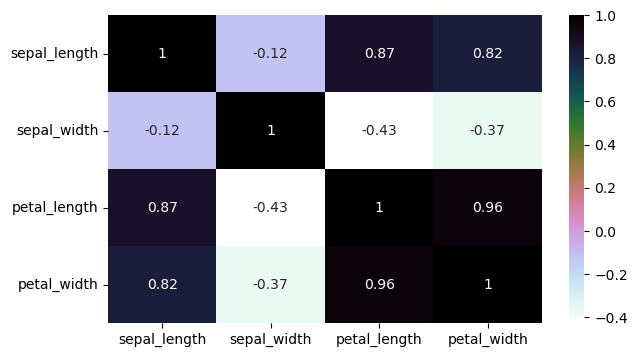

In [48]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X = df.drop(columns=['species'])
Y = le.fit_transform(df['species'])

In [50]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)



Training SVM...
SVM Accuracy: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



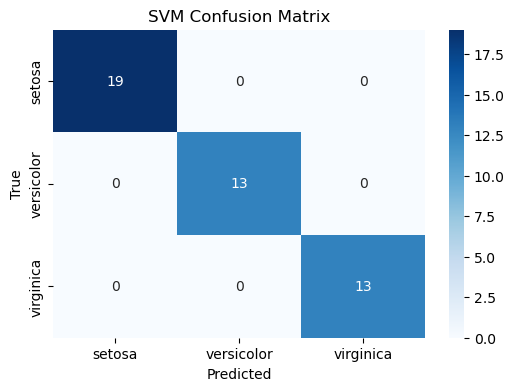

Training Random Forest...
Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



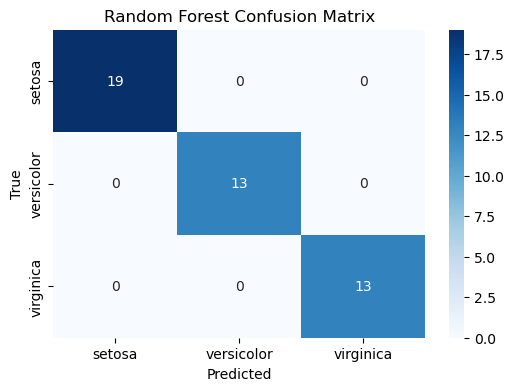

Training Logistic Regression...
Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



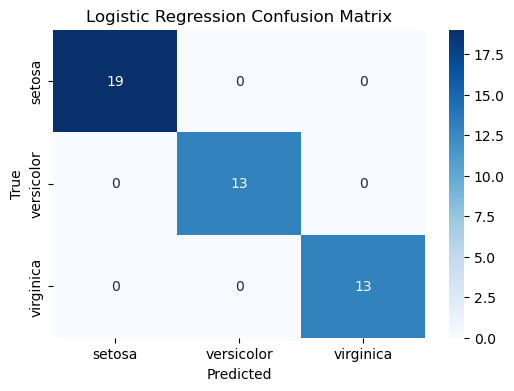

Training Gradient Boosting...
Gradient Boosting Accuracy: 1.00
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



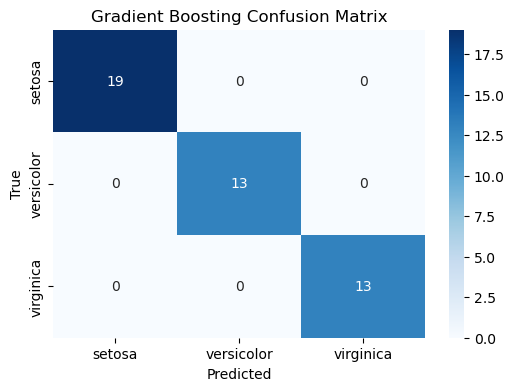

Training GaussianNB...
GaussianNB Accuracy: 0.98
GaussianNB Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



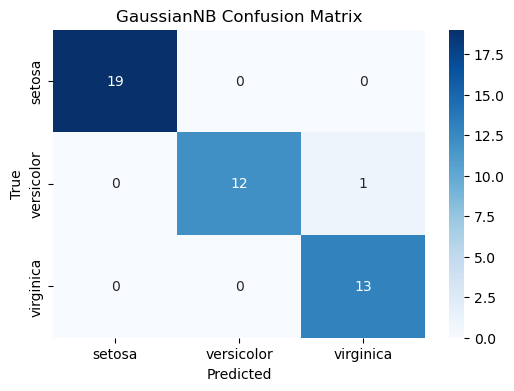

Training RidgeClassifierCV...
RidgeClassifierCV Accuracy: 0.82
RidgeClassifierCV Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.78      0.54      0.64        13
   virginica       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



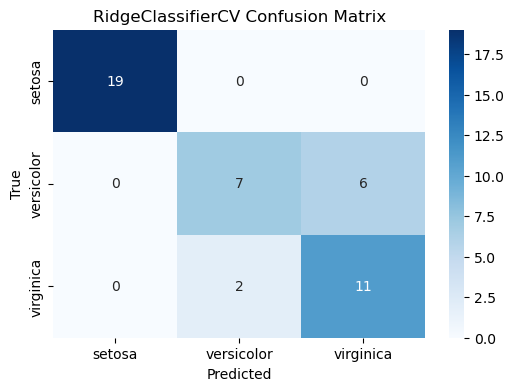

Training SGD Classifier...
SGD Classifier Accuracy: 0.91
SGD Classifier Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



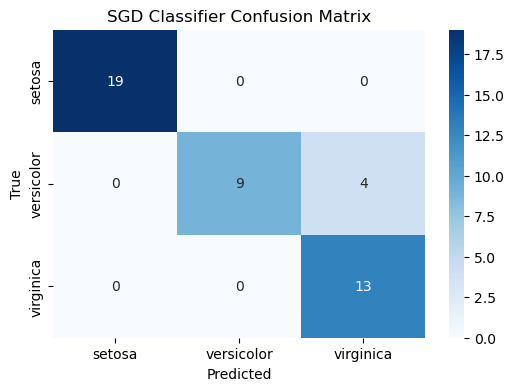

In [53]:
# Define the pipelines
models = {
    "SVM": Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
    "Random Forest": Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]),
    "Logistic Regression": Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000))]),
    "Gradient Boosting": Pipeline([('scaler', StandardScaler()), ('gb', GradientBoostingClassifier())]),
    "GaussianNB": Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())]),
    "RidgeClassifierCV": Pipeline([('scaler', StandardScaler()), ('ridge', RidgeClassifierCV())]),
    "SGD Classifier": Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier(random_state=42))])
}

# Loop through each pipeline and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    #x-train1= pipelines(x_train)
    model.fit(x_train, y_train)
    
    # Predict using the trained model
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy = accuracy
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    
    # Print classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=le.classes_, 
                yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


GaussianNB Accuracy: 0.98
GaussianNB Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



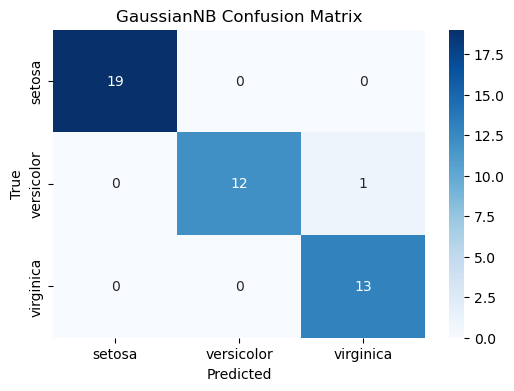

GaussianNB model saved successfully!


In [56]:
# Create a Pipeline specific to GaussianNB
pipeline_gnb = Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])  


# Train the model
pipeline_gnb.fit(x_train, y_train)  


# Predict using the trained model
y_pred = pipeline_gnb.predict(x_test)  


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"GaussianNB Accuracy: {accuracy:.2f}")  


# Print the classification report
print("GaussianNB Classification Report:")  
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("GaussianNB Confusion Matrix")  

plt.show()

# Save the model
joblib.dump(pipeline_gnb, 'gaussian_nb_model.pkl')  

print("GaussianNB model saved successfully!")  


In [ ]:
# load the save model
loaded_model = joblib.load('gaussian_nb_model.pkl')

# Use model to predict test data
new_predictions = loaded_model.predict(x_test)  # تأكد من أن x_test مقيسة إذا كنت بحاجة إلى ذلك
print("Predictions:", new_predictions)

#show the accuracy of model
accuracy = accuracy_score(y_test, new_predictions)
print(accuracy)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
0.9777777777777777


In [59]:
# Load the saved model
loaded_model = joblib.load('gaussian_nb_model.pkl')

# Test data
test_data = [
    [5.1, 3.5, 1.4, 0.2],  # Should be Setosa
    [6.7, 3.0, 5.2, 2.3],  # Should be Virginica
    [5.8, 2.7, 4.1, 1.0],  # Should be Versicolor
    [4.9, 3.1, 1.5, 0.1],  # Should be Setosa
    [6.0, 2.2, 5.0, 1.5],  # Should be Virginica
    [5.5, 2.3, 4.0, 1.3]   # Should be Versicolor
]

# Predict using the loaded model
predictions = loaded_model.predict(test_data)

# Convert numbers to class names
predicted_classes = le.inverse_transform(predictions)
# Display the results
print("Predictions with Class Names:")
for i, class_name in enumerate(predicted_classes):
    print(f"Sample {i+1}: Predicted Class = {class_name}")

Predictions with Class Names:
Sample 1: Predicted Class = setosa
Sample 2: Predicted Class = virginica
Sample 3: Predicted Class = versicolor
Sample 4: Predicted Class = setosa
Sample 5: Predicted Class = versicolor
Sample 6: Predicted Class = versicolor
